# N<span style="color: #99ffff;">-</span>AND ITALIA <span style="color: #99ffff;">-</span> ADEBANJI ADELOWO

## Working with the DataBase: VENPAYBI

### The Table BiTXDequeuersInstantKpis

In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

First establish connection to the database using python

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'vpay-asdmi.public.21203d2a181c.database.windows.net,3342' 
database = 'VENPAY-BI' 
username = 'nandaa' 
password = 'Timileyin1998'  

engine = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = engine.cursor()

In [24]:
query = """ SELECT *
        FROM BiTXDequeuersInstantKpis
 """

df_bitx1 = pd.read_sql(query, engine)
df_bitx1.head()

In [ ]:
query = """ SELECT *
        FROM BiTXDequeuers B INNER JOIN BiTXDequeuersInstantKpis BD ON B.PK_BiTXDequeuerId = BD.FK_BiTXDequeuerId
 """

df_bitx1 = pd.read_sql(query, engine)
df_bitx1.head()

,PK_BiTXDequeuerId,Hostname,DequeuerName,QueueName,LastKpi,PK_BiTXDequeuersInstantKpisId,FK_BiTXDequeuerId,ReferenceDate,DequeueCompletedCounter,DequeueErrorsCounter,ProcessCompletedCounter,ProcessErrorsCounter,IsDequeueError,IsProcessError
0,1,conn01,AppInbDeq,YBDInbound,None,1,1,2022-12-19 08:05:00,0,0,0,0,False,False
1,1,conn01,AppInbDeq,YBDInbound,None,2,1,2022-12-19 08:10:00,0,0,0,0,False,False
2,1,conn01,AppInbDeq,YBDInbound,None,3,1,2022-12-19 08:15:00,0,0,0,0,False,False
3,1,conn01,AppInbDeq,YBDInbound,None,4,1,2022-12-19 08:20:00,0,0,0,0,False,False
4,1,conn01,AppInbDeq,YBDInbound,None,5,1,2022-12-19 08:25:00,0,0,0,0,False,False


In [ ]:
df_bitx1.describe()

,PK_BiTXDequeuerId,PK_BiTXDequeuersInstantKpisId,FK_BiTXDequeuerId,DequeueCompletedCounter,DequeueErrorsCounter,ProcessCompletedCounter,ProcessErrorsCounter
count,554065.000000,554065.000000,554065.000000,554065.000000,554065.000000,554065.000000,554065.0
mean,6.407750,286988.363275,6.407750,0.120219,14.465014,0.120219,0.0
std,2.934394,160021.523728,2.934394,6.900398,240.847588,6.900409,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,4.000000,148516.000000,4.000000,0.000000,0.000000,0.000000,0.0
50%,6.000000,287032.000000,6.000000,0.000000,0.000000,0.000000,0.0
75%,9.000000,425548.000000,9.000000,0.000000,0.000000,0.000000,0.0
max,11.000000,564064.000000,11.000000,2883.000000,4387.000000,2883.000000,0.0


In [ ]:

query = """ SELECT FK_BiTXDequeuerId, 
                COUNT(*) AS Count1,
                SUM(DequeueCompletedCounter) AS Count2
        FROM BiTXDequeuers B INNER JOIN BiTXDequeuersInstantKpis BD ON B.PK_BiTXDequeuerId = BD.FK_BiTXDequeuerId
        GROUP BY FK_BiTXDequeuerId, DequeuerName
 """

df_bitx2 = pd.read_sql(query, engine)
df_bitx2

,FK_BiTXDequeuerId,Count1,Count2
0,5,54478,0
1,11,54478,0
2,1,9294,1
3,3,54478,643
4,4,54478,294
5,9,54478,13879
6,2,54478,30
7,8,54478,373
8,6,54469,50646
9,10,54478,179


<Axes: xlabel='FK_BiTXDequeuerId'>

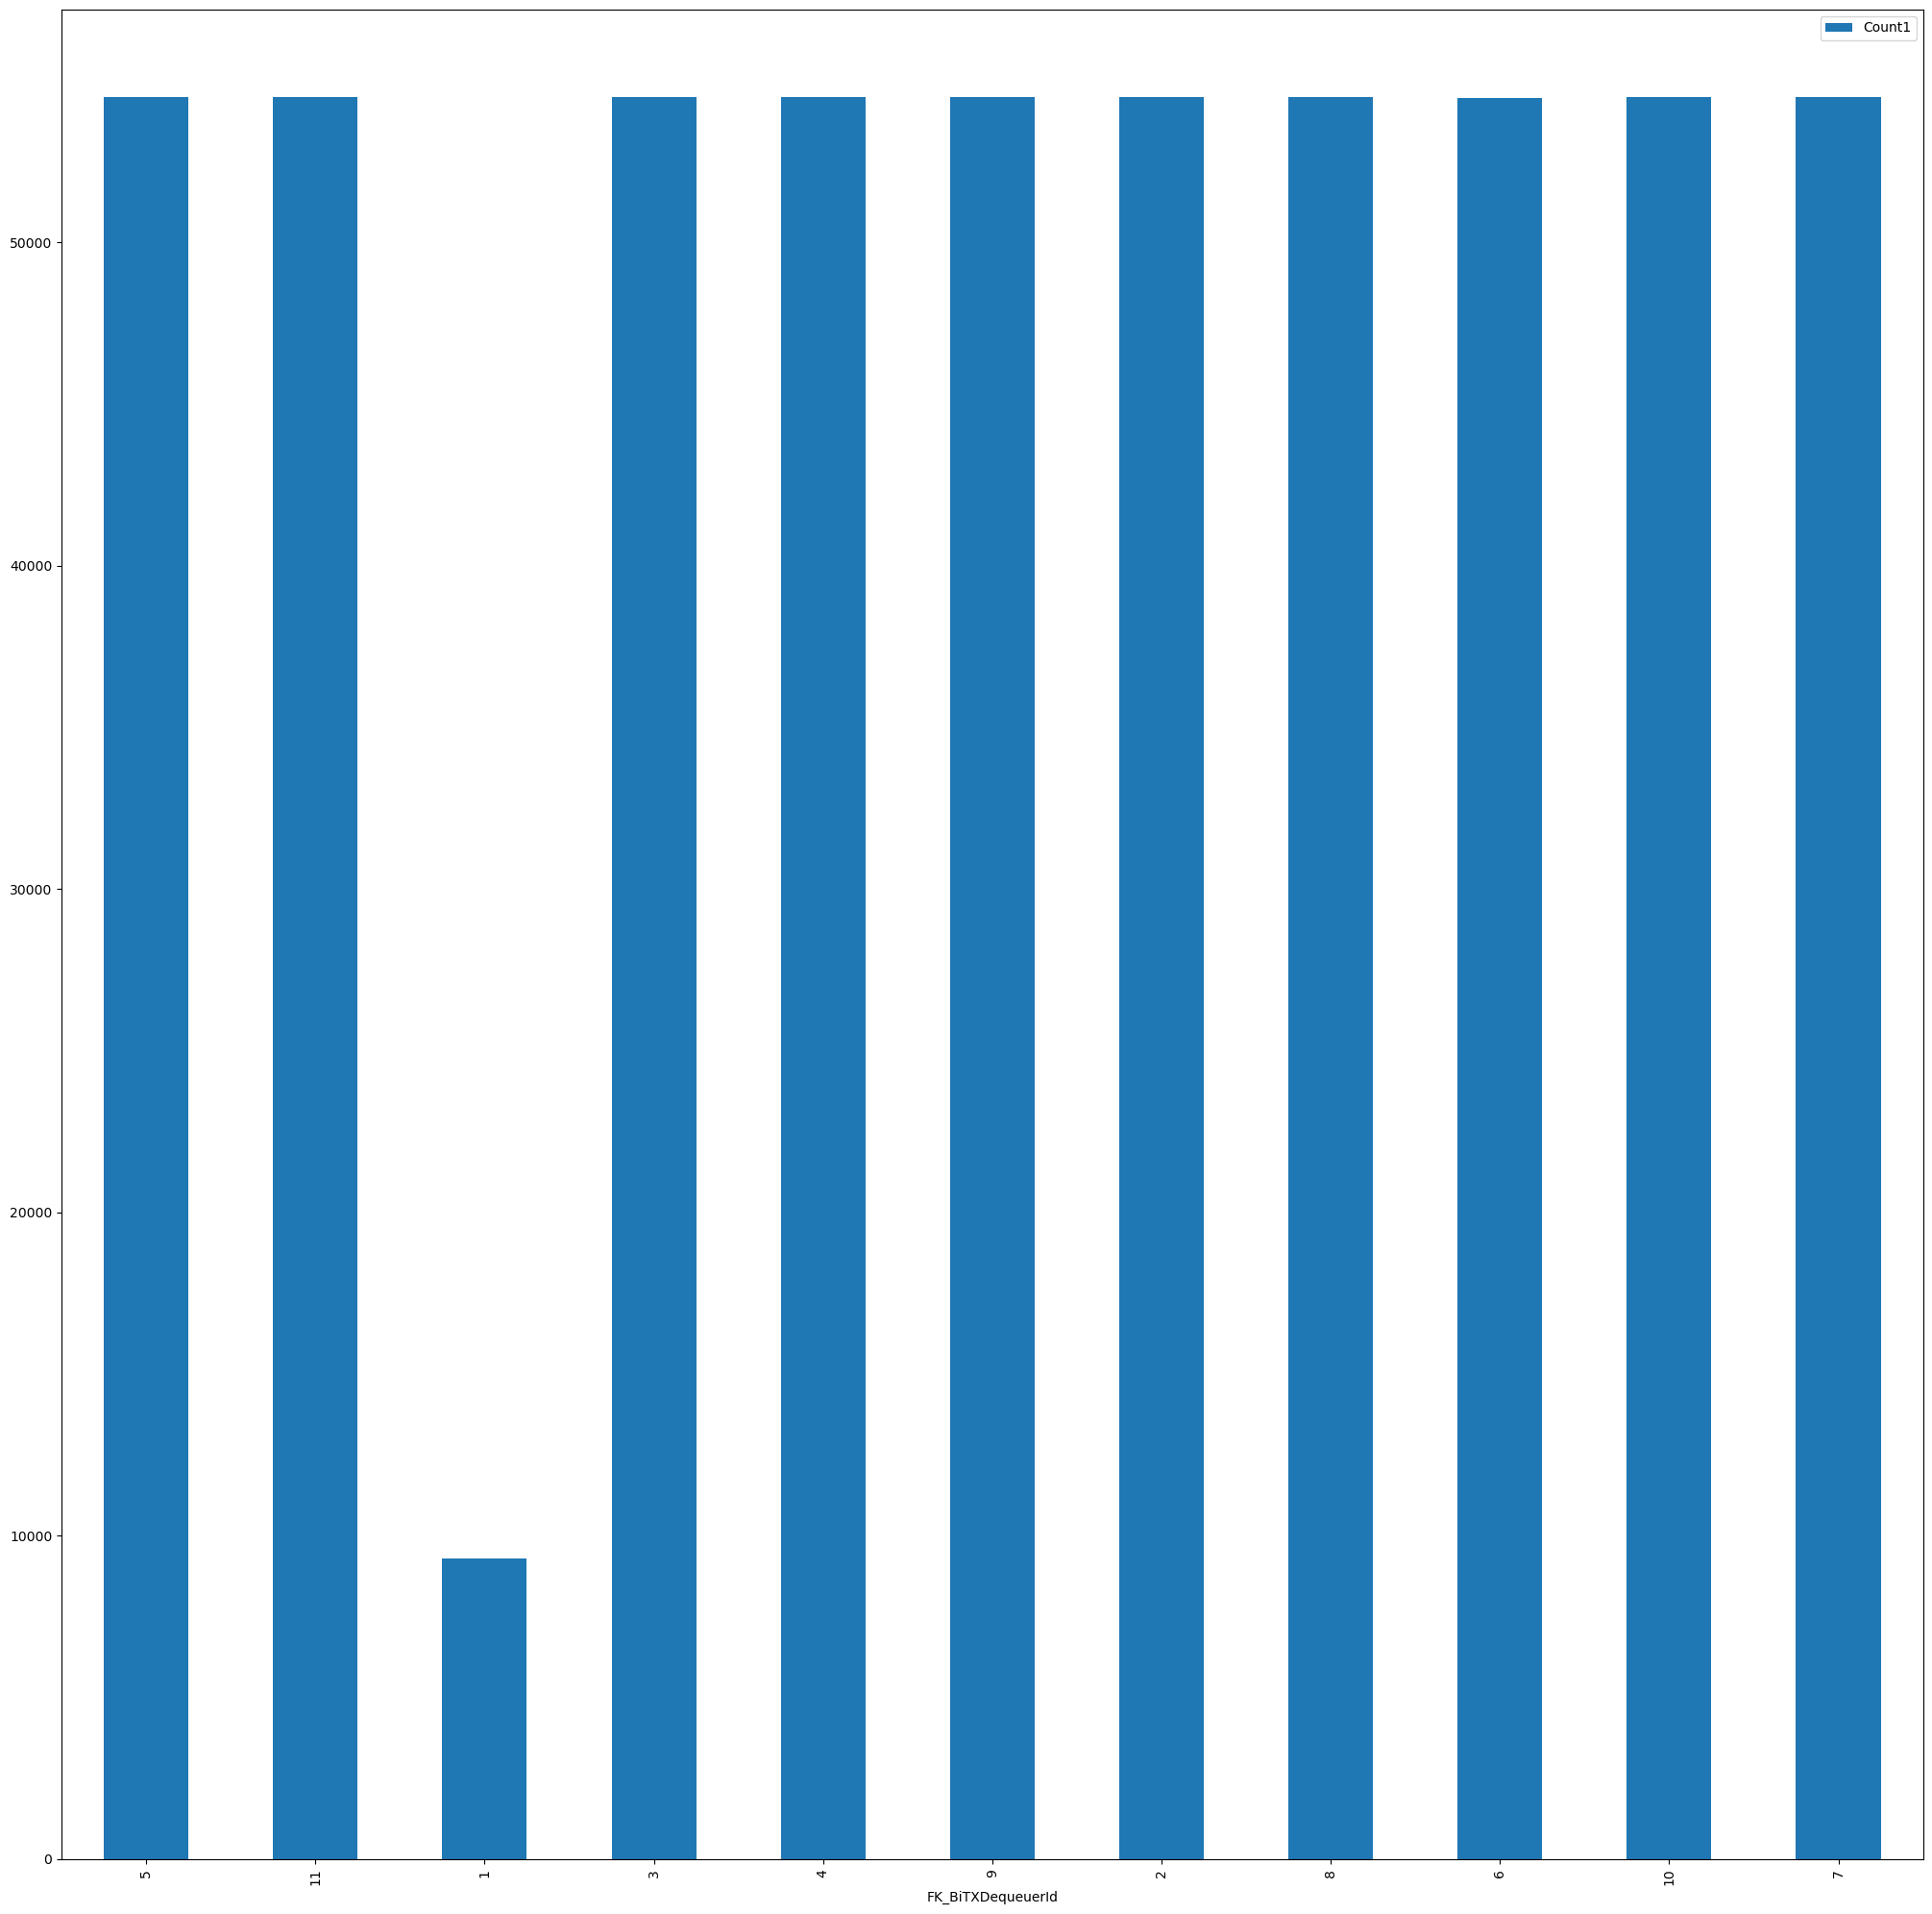

In [ ]:
df_bitx2.plot(
  kind="bar",
  x="FK_BiTXDequeuerId",     
  y="Count1",
  figsize=(25, 25)
  )

<Axes: xlabel='FK_BiTXDequeuerId'>

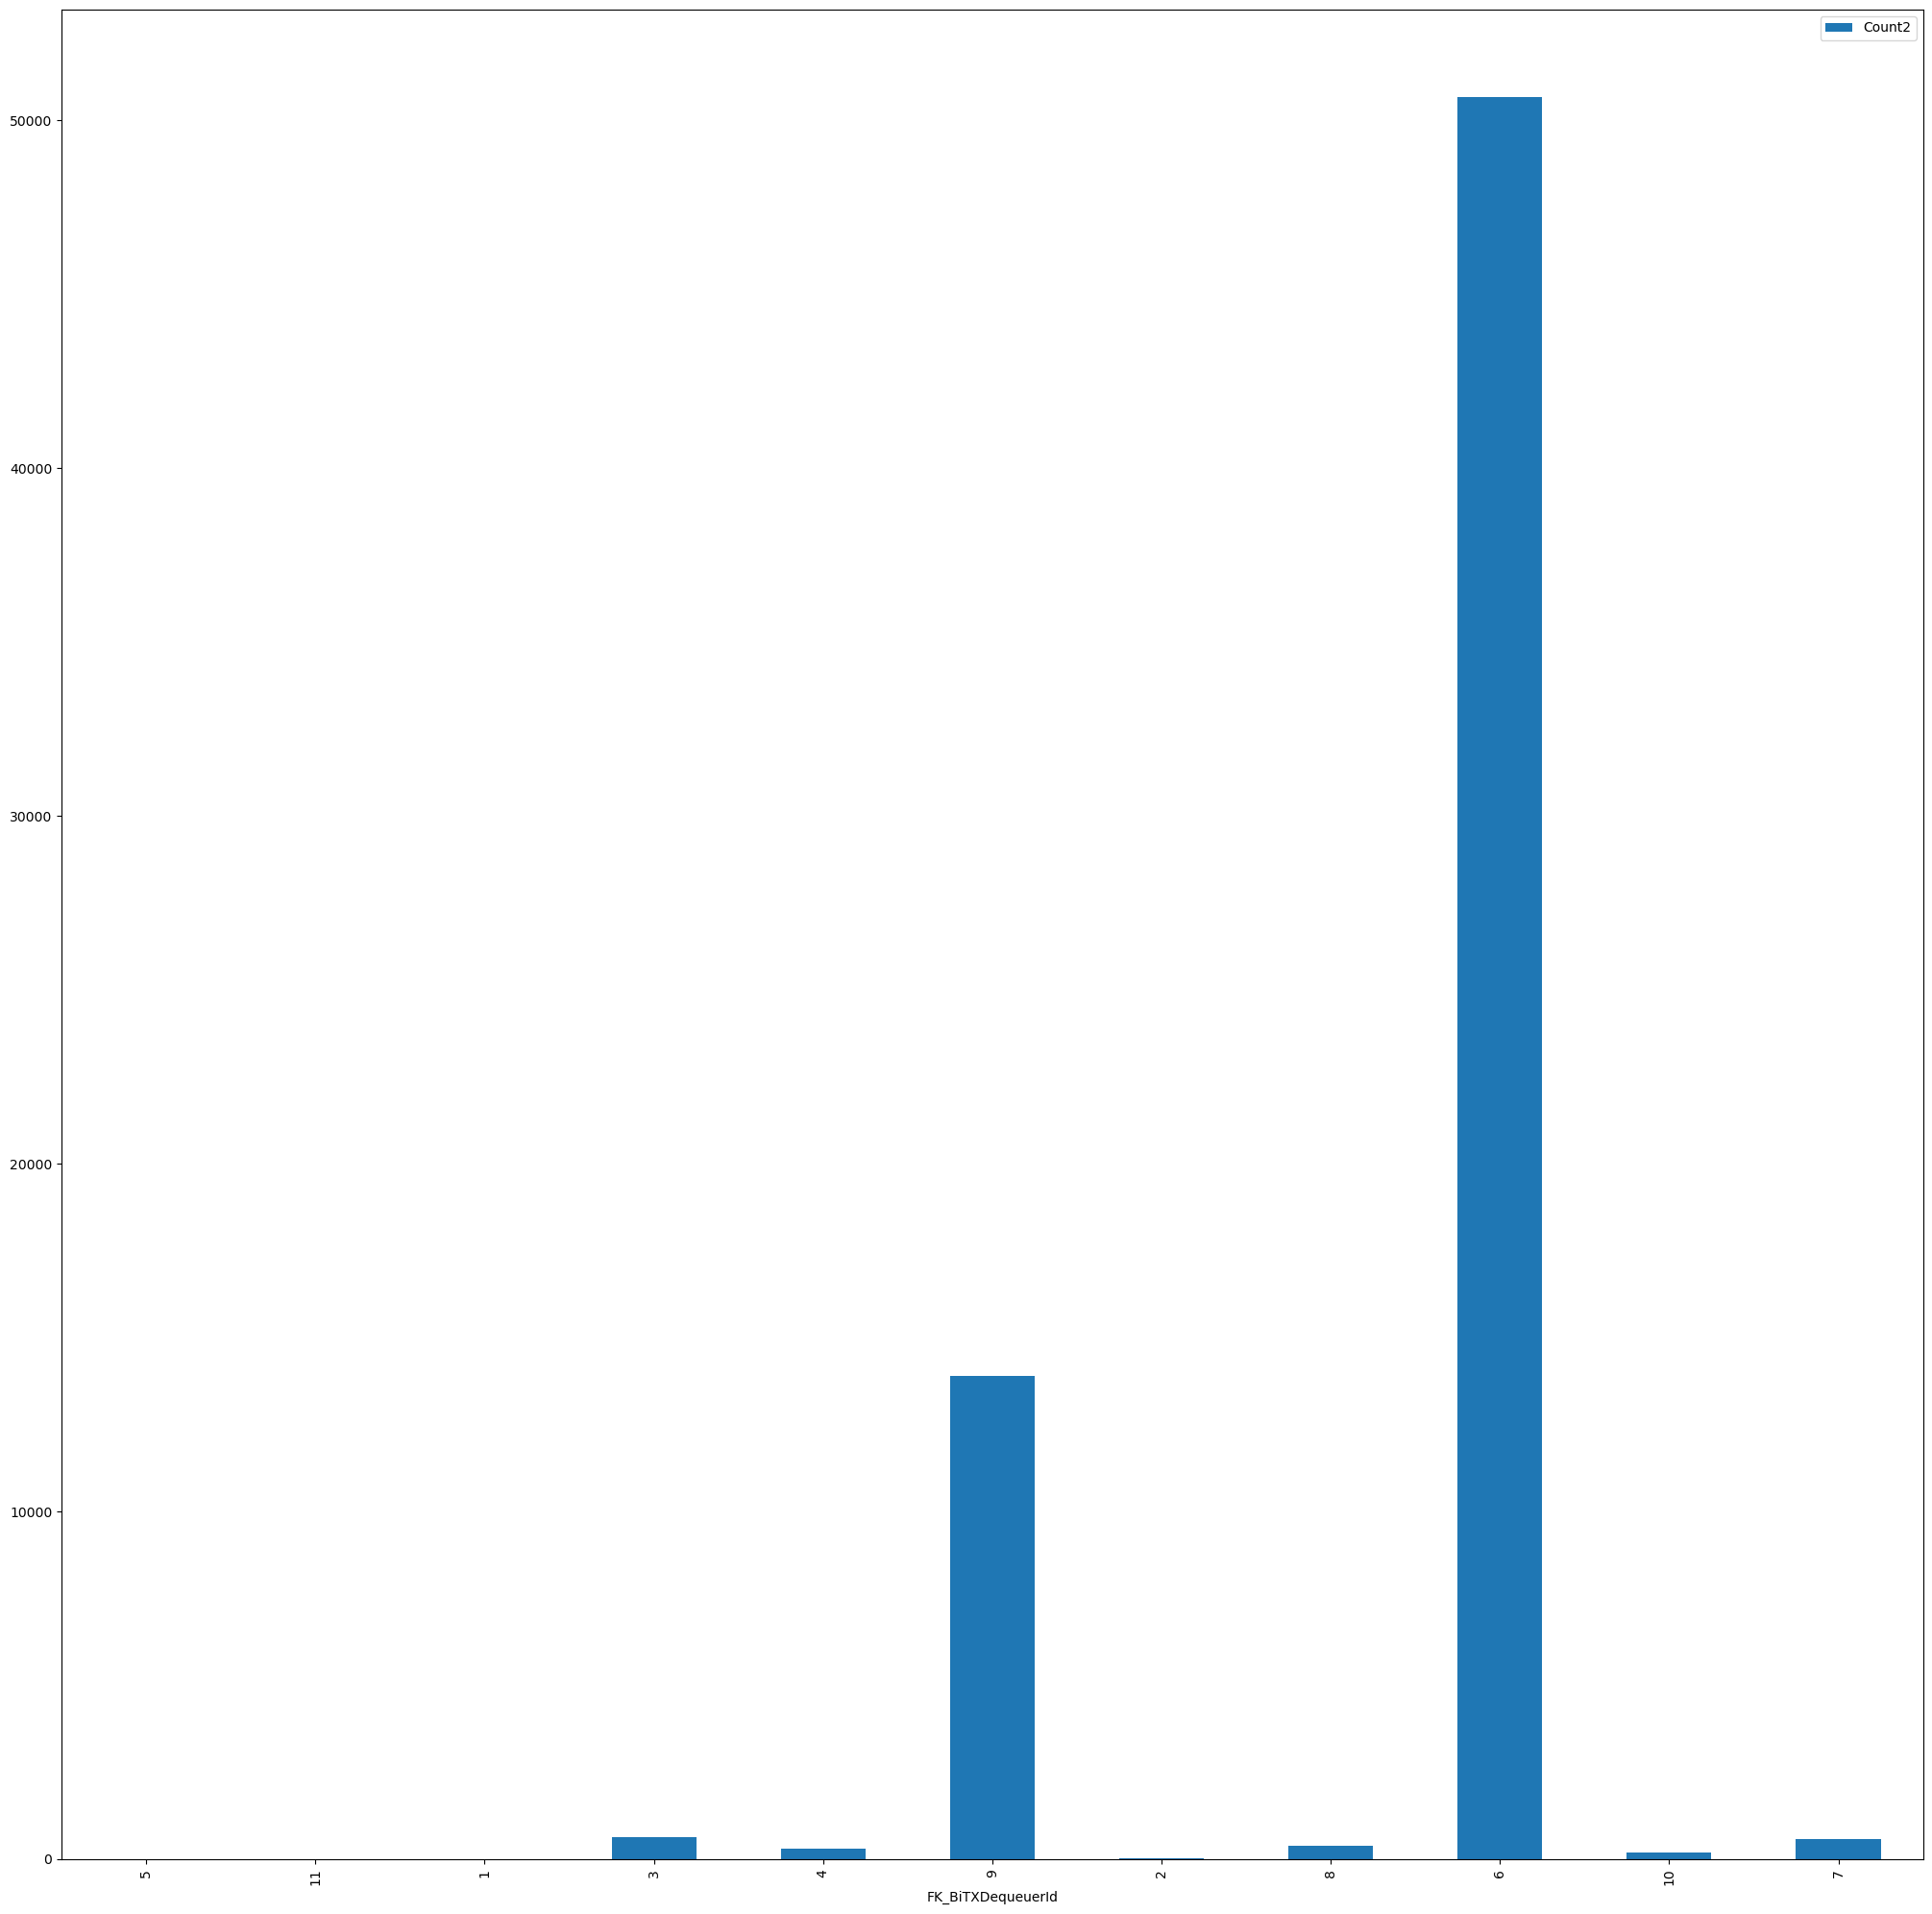

In [ ]:
df_bitx2.plot(
  kind="bar",
  x="FK_BiTXDequeuerId",     
  y="Count2",
  figsize=(25, 25)
  )

In [ ]:
df_bitx2.describe()

,FK_BiTXDequeuerId,Count1,Count2
count,11.000000,11.000000,11.000000
mean,6.000000,50369.545455,6055.363636
std,3.316625,13623.217501,15346.961564
min,1.000000,9294.000000,0.000000
25%,3.500000,54478.000000,15.500000
50%,6.000000,54478.000000,294.000000
75%,8.500000,54478.000000,603.500000
max,11.000000,54478.000000,50646.000000
